# Week 05

## Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import MinMaxScaler, StandardScaler

## Dataset Exploration

Let's revisit the house dataset from HW02.

In [3]:
# Define the location of the json file here
HOUSES_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/LA_housing.json"

houses_info = object_from_json_url(HOUSES_FILE)

### Some "light" exploration:

Ok. We should now have a list of objects with information about houses in LA.

Let's work with the data to answer the following questions:
- How many houses are in this dataset?
- How many *features* does our dataset have? Features are the individual pieces of information about each house.
- What are the *features*?
- What's the min, max and average price for the houses in the dataset?

In [11]:
# TODO: fill out the code here to answer the questions about our dataset

# How many houses are in the dataset?
num_houses = len(houses_info)

# What are the features of the dataset?
house_features = houses_info[0].keys()

# Number of features:
num_features = len(houses_info[0].keys())

print(houses_info[0], house_features, num_houses, num_features)

{'longitude': -117.71, 'latitude': 34.15, 'age': 17, 'rooms': 7.66219723183391, 'bedrooms': 1.0250865051903115, 'value': 3491000} dict_keys(['longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'value']) 5779 6


### Get the info about the prices here

We should probably create a separate list with just prices and then do the calculations

In [16]:
# TODO: get statistics about house prices

# List of prices
house_prices = [(houses_info[i]['value']) for i in range(num_houses)]
#print(house_prices)

# min price
min_price = min(house_prices)

# max price
max_price = max(house_prices)

# avg price
avg_price = sum(house_prices) / num_houses

print(min_price, max_price, avg_price)

149990 5497503 2434700.2469285345


### More exploring

What if we wanted to get `min`, `max` and `average` values for all of the features?

# 😖

Repeating the code above, can get really annoying really quick, but hopefully we can use the `Pandas` library to help.

Once we load our data into a `DataFrame` we can perform many types of calculations.

Here's how we load our data into a `DataFrame`:

In [17]:
houses_df = pd.DataFrame.from_records(houses_info)

# And we can check the first couple of rows/records with:
houses_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,-117.71,34.15,17,7.662197,1.025087,3491000
1,-117.71,34.12,20,6.051641,1.018289,2395000
2,-117.71,34.10,52,4.500000,1.206349,2125000
3,-117.71,34.10,41,4.512195,1.056911,1250000
4,-117.71,34.09,36,5.459627,0.985507,1587000


### DataFrame

A `DataFrame` looks kind of like a spreadsheet. It has rows of items, and columns of features.

<img src="./imgs/data_frame.jpg" width="700px">

Now we have access to each feature by simply indexing the `DataFrame` by the feature's name.

For example, to get the column with all of the prices and print the prices of the first $5$ houses in the dataset:

In [18]:
house_prices = houses_df["value"]

# print first 5
house_prices.head()

0    3491000
1    2395000
2    2125000
3    1250000
4    1587000
Name: value, dtype: int64

### Get other columns

Get the column with all of the ages of the houses.

In [19]:
# TODO: get age column, print first 5 value
house_ages = houses_df["age"]
house_ages.head()

0    17
1    20
2    52
3    41
4    36
Name: age, dtype: int64

### Subsections

#### By columns

We can also get a sub-section of our original data with only the `age` and `value` features, by indexing the original `DataFrame` with a list of the columns we want:

In [20]:
house_ages_values = houses_df[["age", "value"]]
house_ages_values.head()

,age,value
0,17,3491000
1,20,2395000
2,52,2125000
3,41,1250000
4,36,1587000


#### By rows

We can also get subsections of our `DataFrame` by row index using its `loc` member variable.

To get rows $100$ to $110$, we can use this:

In [21]:
houses_100_110_df = houses_df.iloc[100:110]
houses_100_110_df

,longitude,latitude,age,rooms,bedrooms,value
100,-117.75,33.61,17,4.787356,1.084291,1865000
101,-117.76,34.13,8,7.773191,1.054731,3587000
102,-117.76,34.11,22,5.261194,1.017058,1805000
103,-117.76,34.10,28,4.790152,1.021102,2022000
104,-117.76,34.08,37,4.335249,0.961686,1392000
105,-117.76,34.07,51,3.963918,1.015464,1098000
106,-117.76,34.07,48,5.307339,1.133028,1272000
107,-117.76,34.06,47,5.906977,1.255814,926000
108,-117.76,34.06,33,3.879237,1.029661,1036000
109,-117.76,34.05,36,4.075372,1.065817,1162000


#### By arbitrary boolean expressions

We can also index `DataFrames` using boolean expressions to perform quick searches on our data.

To get the row with the smallest `value`, we could use this:

In [22]:
house_cheapest_df = houses_df[houses_df["value"] == min_price]
house_cheapest_df

,longitude,latitude,age,rooms,bedrooms,value
393,-117.86,34.24,55,3.568889,1.186667,149990


To get all houses that are more expensive than $5,000,000$, we can use an inequality inside the brackets:

In [23]:
houses_gt5M_df = houses_df[houses_df["value"] > 5e6]
houses_gt5M_df

,longitude,latitude,age,rooms,bedrooms,value
132,-117.77,33.76,19,8.291080,0.943662,5440341
150,-117.78,33.97,2,10.296296,1.166667,5330419
160,-117.78,33.76,25,8.897638,1.027559,5363136
179,-117.79,33.75,26,7.922252,1.010724,5233487
180,-117.79,33.75,26,8.874233,1.058282,5194055
...,...,...,...,...,...,...
5766,-118.66,34.10,12,6.994536,0.997268,5004015
5767,-118.66,34.02,23,7.283113,1.212748,5201107
5775,-118.68,34.08,18,4.857143,0.809524,5430566
5776,-118.69,34.21,10,9.873315,1.102426,5401591


Or combine multiple expressions with operators.

To get all rows where the houses are more expensive than $5,000,000$ and have more than 10 rooms, we can use this:

(the parenthesis around each expression is important)

In [24]:
houses_gt5M_10rooms_df = houses_df[(houses_df["value"] > 5e6) & (houses_df["rooms"] > 10)]
houses_gt5M_10rooms_df

,longitude,latitude,age,rooms,bedrooms,value
150,-117.78,33.97,2,10.296296,1.166667,5330419
2162,-118.12,34.12,54,10.419355,1.136201,5269310
4918,-118.40,34.09,45,10.370656,1.092664,5374947
5193,-118.43,33.97,16,17.500000,1.750000,5022127
5298,-118.45,34.08,55,10.344828,1.213793,5449736


### Doing some maths

This is also easier with `DataFrames` because they have built-in math functions.

To get the smallest value of a *feature*:

In [25]:
min_price = houses_df["value"].min()
min_price

np.int64(149990)

And the `average`:

In [26]:
avg_price = houses_df["value"].mean()
avg_price

np.float64(2434700.2469285345)

### Other functions

Try out the `count()`, `max()`, `sum()` and `median()` functions to get more information about the house prices

In [27]:
# TODO: find max, sum, median and count of house prices (value)

max_price = houses_df["value"].max()
sum_price = houses_df["value"].sum()
median_price = houses_df["value"].median()
count_price = houses_df["value"].count()

print(max_price, sum_price, median_price, count_price)

5497503 14070132727 2111000.0 5779


### Getting column names

This gives us a list with the names of the *features*/*columns*:

In [28]:
house_features = list(houses_df.columns)
house_features

['longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'value']

It's similar to how we did `houses_info[0].keys()` above.

Either way, we can now iterate over a list of the feature names to calculate `min`, `max` and `average` (and whatever else we want) for all of the *feature*:

In [29]:
for f in house_features:
  print(f)
  print("\tmin:", houses_df[f].min())
  print("\tmax:", houses_df[f].max())
  print("\tavg:", houses_df[f].mean())

longitude
	min: -118.69
	max: -117.71
	avg: -118.1780394531926
latitude
	min: 33.61
	max: 34.29
	avg: 33.974505969890984
age
	min: 2
	max: 55
	avg: 32.5625540750995
rooms
	min: 0.8461538461538461
	max: 17.5
	avg: 4.923044472091834
bedrooms
	min: 0.5
	max: 1.9259259259259258
	avg: 1.0477589611474183
value
	min: 149990
	max: 5497503
	avg: 2434700.2469285345


We can even ask for the `min` (or `max`, or `average`) of the whole `DataFrame` and it knows to do it for each column:

In [30]:
houses_df.min()

longitude      -118.690000
latitude         33.610000
age               2.000000
rooms             0.846154
bedrooms          0.500000
value        149990.000000
dtype: float64

### Average / Mean

The average, or mean, value of a set of numbers is a quantity that represents the center of a collection of numbers. What this means is that we expect about half of the numbers in a collection to be higher than the mean, and the other half to be lower.

The mean of a set of numbers $x_1, x_2, ..., x_n$ is calculated by dividing the sum of the values by the number of values. It's sometimes written like this:

$\displaystyle \mu = \frac{1}{n} \sum_{i=1}^{n} x_i$

which is the same as `sum(X) / len(X)` in Python if `X` is our list of values.

### Standard Deviation

In addition to the mean, the standard deviation is a measure of the amount of variation in a sequence of numbers.

It's calculated by taking the square root of the average of the squared differences of each point to the mean of the sequence.

In other words, first we calculate the difference between each point and the mean, and square this difference, then sum all of them up, divide by the number of values in the sequence, and finally take the square root:

$\displaystyle \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(x_{i} - \mu \right)^{2}}$

The standard deviation is a measurement of how close all of the points are to the mean.

<img src="./imgs/std_dev.jpg" width="800px"/>

Unfortunately, there is no short Python code for computing the standard deviation like there is for the average, but the `DataFrame` object has a function for computing it. It's called `std()`

In [31]:
# mean and standard deviation for each feature
for f in houses_df.columns:
  print(f)
  print("\tavg:", houses_df[f].mean())
  print("\tstd:", houses_df[f].std())

longitude
	avg: -118.1780394531926
	std: 0.20923432875024417
latitude
	avg: 33.974505969890984
	std: 0.156661731072715
age
	avg: 32.5625540750995
	std: 10.652461146156755
rooms
	avg: 4.923044472091834
	std: 1.2753225332202778
bedrooms
	avg: 1.0477589611474183
	std: 0.08105458824019492
value
	avg: 2434700.2469285345
	std: 1147863.0953702824


We can see that there's greater variability in the number of rooms of a house when compared to the number of bedrooms, but besides that, this isn't very useful yet because we can't really compare the standard deviations from different *features* that have different units.

We'll see soon how we can use `mean` and `standard deviation` to compare, combine, extrapolate values that were measured in different units.

### Correlation

In week 02 we talked a little bit about correlation, and how it's a way to express how $2$ independent variables (measurements) are related to each other.

<img src="./imgs/correlation.jpg" width="800px">

Correlation can be *positive*, or, *direct*, if an increase in one of the variables comes with an increase in the other.

It can be *negative*, or, *inverse*, if an increase in one of the variables is accompanied by a decrease in the other.

Or, it can be *weak*, or, show *NO* correlation, if a change in one variable doesn't seem to be accompanied by a change in the other.

### House Prices

Let's say we want to figure out if there are any *features* that correlate strongly with the house prices.

This means figuring out if there are any other *features* that are a good indication for the value of a house.

We only have a handful of *features*, so we can always plot them.

This is a lot easier with `DataFrames` because we don't have to separate our list of values from an object first. We can just give the `DataFrame` column to the plot function.

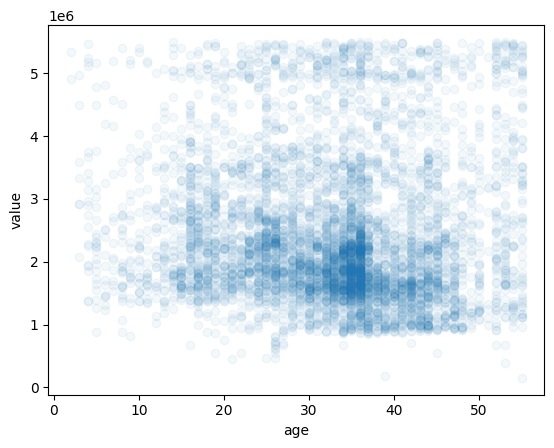

In [34]:
plt.scatter(houses_df["age"], houses_df["value"], alpha=0.05)
plt.xlabel("age")
plt.ylabel("value")
plt.show()

### Plot other features

Even thought there aren't many features, we should really use a loop...

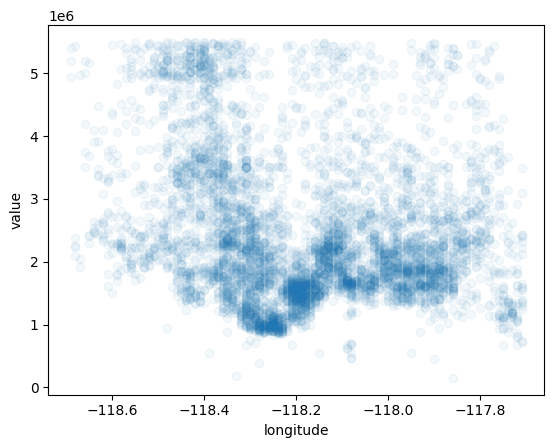

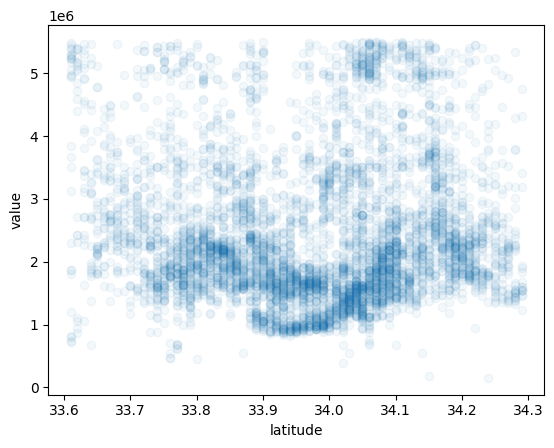

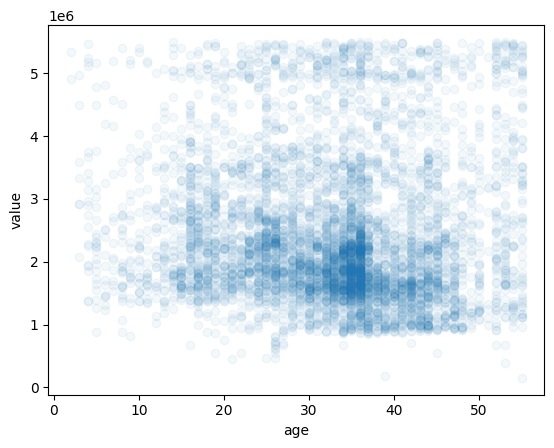

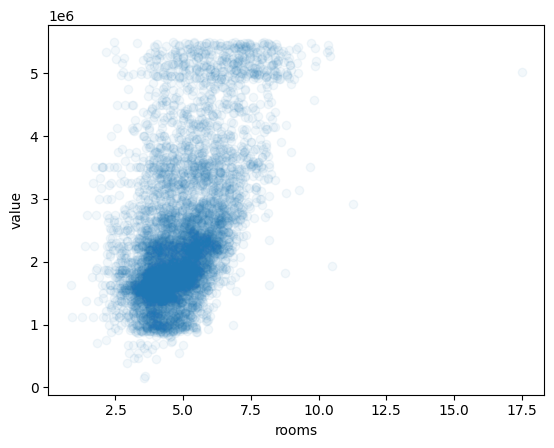

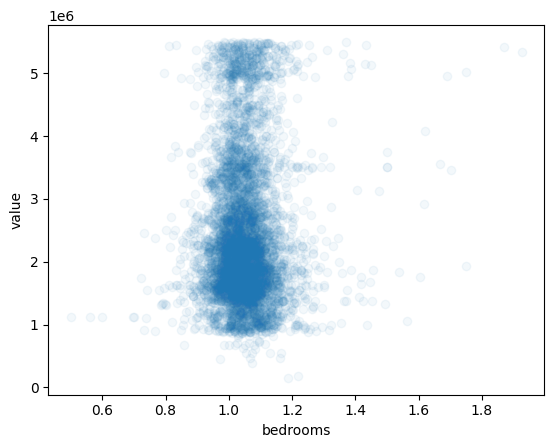

In [38]:
# TODO: use a loop to plot ALL features compared to price

for f in house_features:
    if f != "value":
        plt.scatter(houses_df[f], houses_df["value"], alpha=0.05)
        plt.xlabel(f)
        plt.ylabel("value")
        plt.show()


### Covariance Matrix

Instead of looking at the plots there's actually a mathematical way of calculating how much the *features* of a dataset are *related*.

It's called the [covariance](https://en.wikipedia.org/wiki/Covariance), and it measures how much $2$ *features* change together.

One way to measure the covariance is to find the average of the product of pairs of differences of measurements and their means.

# 🤔

To calculate the covariance between `age` and `price` we would have to go through all of our data, subtract average `age` and average `price` from `age` and `price` values for each house, multiply these differences together, and then sum up all of the products and divide by the total number of houses.

$\displaystyle cov(age,\ price) = \frac{1}{n} \sum_{i}{(age_i - avg(age))\ (price_i - avg(price))}$

But, with our `DataFrame` we can just call a function that computes the covariance between any group of columns.

In [39]:
# covariance between age and price
houses_df[["age", "value"]].cov()

,age,value
age,113.474928,-4.051210e+05
value,-405121.027824,1.317590e+12


### Try it out

Computer some covariances and see if they match with the plots above

In [41]:
# TODO: display some other pairs of covariances
#longitude', 'latitude', 'age', 'rooms', 'bedrooms', 'value

houses_df[["bedrooms", "value"]].cov()

,bedrooms,value
bedrooms,0.00657,2.642742e+03
value,2642.74249,1.317590e+12


### Displaying all of the covariances

This will display a table/matrix that shows how much each variable is related to every other variable.

In [42]:
houses_df.cov()

,longitude,latitude,age,rooms,bedrooms,value
longitude,0.043779,-0.016565,-0.623192,0.039776,-0.000965,-5.472691e+04
latitude,-0.016565,0.024543,0.453918,-0.017055,-0.000085,1.804133e+03
age,-0.623192,0.453918,113.474928,-0.498693,-0.093484,-4.051210e+05
rooms,0.039776,-0.017055,-0.498693,1.626448,0.001136,7.454463e+05
bedrooms,-0.000965,-0.000085,-0.093484,0.001136,0.006570,2.642742e+03
value,-54726.912777,1804.133416,-405121.027824,745446.273752,2642.742490,1.317590e+12


Covariances can be used if we have to reduce the amount of data used while train models because sometimes we can remove *features* that are too strongly correlated because they don't add any new information about our data.

For example, if our dataset had *features* for the area of our houses in both `squared meters` and `squared feet`, they would be strongly correlated and one of them could be dropped.

Or, conversely, if we are trying to predict house prices and have *features* that don't contribute at all to the price of a house, they could also be removed from the training of our model.

For now we can just look at the covariances for the `value` *feature*:

In [43]:
houses_df.cov()["value"]

longitude   -5.472691e+04
latitude     1.804133e+03
age         -4.051210e+05
rooms        7.454463e+05
bedrooms     2.642742e+03
value        1.317590e+12
Name: value, dtype: float64

If we look at the *covariances* with the largest magnitudes, we can see that:
- `value` correlates with `rooms`: the more rooms, the higher the price of a house.
- `value` correlates inversely with `age`: the older the house, the less valuable it is.
- `value` correlates somewhat with `longitude`.

We skipped the largest magnitude of them all, because it's the correlation between `value` and itself, which should be high.

### Normalizing / Standardizing / Scaling

The above calculations give us some extra information about the data, but there are problems:

All of the *features* are in different units. The range of the `rooms` *feature* is between $1$ and $17$, while the range of `age` is $2$ to $55$, and `latitude` and `longitude` vary by at most $1$ degree.

Using different units to calculate the *covariance* can exaggerate how much certain *features* actually influence each other.

In order to calculate *covariance* correctly we have to normalize the data in all columns to be *unitless*.

One way to do this is to scale each value to be within the range $[0, 1]$ relative to the `min` and `max` values of their column.

### [MinMax Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html):

<img src="./imgs/scaling_min_max.jpg" width="700px">

The math is not very complicated, it's actually exactly like the `map()` function from `p5.js`, but we're going to use a library that will do this for us because it can do on multiple columns at the same time and it will keep track of the changes we make to our original `DataFrame`.

In [44]:
# Scale all the values to be between 0, 1

# This creates a scaler object we can use
min_max_scaler = MinMaxScaler()

# This is how we use the object on our data
houses_min_max_df = min_max_scaler.fit_transform(houses_df)

# Scaled version of DataFrame
houses_min_max_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,1.0,0.794118,0.283019,0.409277,0.368242,0.624778
1,1.0,0.750000,0.339623,0.312570,0.363476,0.419823
2,1.0,0.720588,0.943396,0.219400,0.495362,0.369332
3,1.0,0.720588,0.735849,0.220132,0.390561,0.205705
4,1.0,0.705882,0.641509,0.277022,0.340486,0.268725


In [45]:
# Now we can finally correctly calculate the covariances
houses_min_max_df.cov()["value"]

longitude   -0.010443
latitude     0.000496
age         -0.001429
rooms        0.008370
bedrooms     0.000347
value        0.046076
Name: value, dtype: float64

After we scale our features according to the `min` and `max` value of each column, `longitude` is the top feature that correlates with `value`, followed by `rooms` and then `age`.

### [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

This is another type of *normalization* that uses the `mean` and `standard deviation` for each column to center their values at $0$ and have a range of about $[-3, 3]$.

<img src="./imgs/scaling_std.jpg" width="700px">

The math is very similar to `MinMax` scaling.

One of the differences between `MinMax` and `Standard` scaling is that the range for `MinMax` is closed once we scale our data. If later, while collecting some new data, we see some value that is larger than the previously largest number, (or smallest than the smallest number), it will get scaled to something greater than $1$ (or less than $0$), and mess up our scaling.

`Standard` scaling is a bit more resilient to this scenario because our range of $[-3, 3]$ is open. We can always get values larger than $3$, or smaller than $-3$, but they're unlikely. And, unless we collect a lot of new data with wildly different ranges, our `mean` and `std dev` will remain similar and our scaling will still work.

`Standard` scaling is also available from the [Scikit-Learn](https://scikit-learn.org) library, so we can use it just like we used the `MinMax`:

In [46]:
# Scale all the values to be centered at 0 and (mostly) within [-3, 3]

# This creates a scaler object we can use
std_scaler = StandardScaler()

# This is how we use the object on our data
houses_std_df = std_scaler.fit_transform(houses_df)

# Scaled version of DataFrame
houses_std_df.head()

,longitude,latitude,age,rooms,bedrooms,value
0,2.237109,1.120307,-1.461061,2.147998,-0.279743,0.920311
1,2.237109,0.928795,-1.179412,0.885026,-0.363608,-0.034589
2,2.237109,0.801120,1.824849,-0.331744,1.956755,-0.269829
3,2.237109,0.801120,0.792134,-0.322181,0.112916,-1.032181
4,2.237109,0.737283,0.322718,0.420779,-0.768089,-0.738567


In [47]:
# Now we can finally correctly calculate the covariances
houses_std_df.cov()["value"]

longitude   -0.227905
latitude     0.010034
age         -0.033138
rooms        0.509309
bedrooms     0.028409
value        1.000173
Name: value, dtype: float64

We can see that if we scale our features according to the `mean` and `std dev` of each column, `longitude` is the top feature that correlates with `value`, followed by `rooms` and then `age`.

In this case `MinMax` and `Standard` *scaling* are in agreement, but it's not always the case.

Either way, *Normalizing* (or, *Standardizing*, or, *Scaling*) is an important step when working with data.

This is not only true for calculating *covariances* and learning something about our datasets, but is even more important when training models with multiple *features*.

### A Note about scikit-learn



The `MinMaxScaler` and `StandardScaler` classes that we're using in this notebook are coming from the local `data_utils.py` file. The core functionality of these classes is coming from [Scikit-Learn](https://scikit-learn.org/stable/), the popular machine  learning library for Python, but unlike the original Scikit-Learn implementation, these have been modified to work with `DataFrames` instead of just lists.

We can use those classes (and other classes) directly from Scikit-Learn, but the return value of their transformations won't be a `DataFrame`. If we want a `DataFrame` we have to do something like:

```py
houses_std = std_scaler.fit_transform(houses_df.values)
houses_std_df = pd.DataFrame(houses_std, columns=houses_df.columns)
```

## One more dataset

Let's load...

In [48]:
# Define the location of the json file here
DIAMONDS_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/diamonds.json"

# Read into Python object
diamonds_data = object_from_json_url(DIAMONDS_FILE)

# Create DataFrame
diamonds_df = pd.DataFrame.from_records(diamonds_data)

# Look at first few entries
diamonds_df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.51,61.4,59.0,5.10,5.16,3.15,Very Good,E,VVS2,2211
1,0.31,58.9,61.0,4.46,4.43,2.62,Premium,H,VS2,586
2,0.31,62.2,55.0,4.35,4.40,2.72,Ideal,G,IF,891
3,0.78,60.0,56.0,6.00,6.03,3.61,Very Good,E,VS1,3601
4,0.40,62.2,56.0,4.75,4.70,2.94,Ideal,H,VVS2,1125


### Calculate some statistics for the features of this dataset

Use a for loop to get `min()`, `max()`, `mean()` and `std()` for all features.

In [51]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the categorical columns
encoder = OrdinalEncoder()
diamonds_df[['cut', 'color', 'clarity']] = encoder.fit_transform(diamonds_df[['cut', 'color', 'clarity']])

# Get min, max, mean, std for all features
min_max_mean_std = []
for f in diamonds_df.columns:
    min_max_mean_std.append((f, diamonds_df[f].min(), diamonds_df[f].max(), diamonds_df[f].mean(), diamonds_df[f].std()))

min_max_mean_std
    

[('carat',
  np.float64(0.2),
  np.float64(2.19),
  np.float64(0.7464884868421054),
  np.float64(0.39936680316428236)),
 ('depth',
  np.float64(43.0),
  np.float64(71.6),
  np.float64(61.751870888157896),
  np.float64(1.340634807718821)),
 ('table',
  np.float64(49.0),
  np.float64(73.0),
  np.float64(57.38616365131578),
  np.float64(2.1621880082809737)),
 ('x',
  np.float64(3.74),
  np.float64(8.35),
  np.float64(5.636121847587719),
  np.float64(1.021099119941105)),
 ('y',
  np.float64(3.71),
  np.float64(8.3),
  np.float64(5.639258497807018),
  np.float64(1.014822157070998)),
 ('z',
  np.float64(1.41),
  np.float64(6.0),
  np.float64(3.481415158991228),
  np.float64(0.6316824936107895)),
 ('cut',
  np.float64(0.0),
  np.float64(4.0),
  np.float64(2.5677083333333335),
  np.float64(1.0008256534825704)),
 ('color',
  np.float64(0.0),
  np.float64(6.0),
  np.float64(2.5370065789473686),
  np.float64(1.675800590025314)),
 ('clarity',
  np.float64(0.0),
  np.float64(7.0),
  np.float64(3.88

# 😫

Some of the *features* aren't even numerical, they're words/tags that describe some property of the diamond.

We can still do some analysis. The easiest way is to just drop those columns:

In [52]:
diamonds_numerical_df = diamonds_df.drop(columns=["cut", "color", "clarity"])
diamonds_numerical_df.head()

,carat,depth,table,x,y,z,price
0,0.51,61.4,59.0,5.10,5.16,3.15,2211
1,0.31,58.9,61.0,4.46,4.43,2.62,586
2,0.31,62.2,55.0,4.35,4.40,2.72,891
3,0.78,60.0,56.0,6.00,6.03,3.61,3601
4,0.40,62.2,56.0,4.75,4.70,2.94,1125


### Now we can get some statistics

In [53]:
for feat in diamonds_numerical_df.columns:
  print(feat)
  print("\tmin:", diamonds_df[feat].min())
  print("\tmax:", diamonds_df[feat].max())
  print("\tavg:", diamonds_df[feat].mean())
  print("\tstd:", diamonds_df[feat].std())

carat
	min: 0.2
	max: 2.19
	avg: 0.7464884868421054
	std: 0.39936680316428236
depth
	min: 43.0
	max: 71.6
	avg: 61.751870888157896
	std: 1.340634807718821
table
	min: 49.0
	max: 73.0
	avg: 57.38616365131578
	std: 2.1621880082809737
x
	min: 3.74
	max: 8.35
	avg: 5.636121847587719
	std: 1.021099119941105
y
	min: 3.71
	max: 8.3
	avg: 5.639258497807018
	std: 1.014822157070998
z
	min: 1.41
	max: 6.0
	avg: 3.481415158991228
	std: 0.6316824936107895
price
	min: 351
	max: 18803
	avg: 3512.8580043859647
	std: 3371.1787250377706


# 🤷

Which is fine if all we're doing is taking a look at our data, but once we start training models and doing more detailed analyses we'll want to use *ALL* of the data that we have available.

Let's see how to work with non-numerical properties.

### A Note About Features

First, let's think about and organize the different types of *features* we have seen so far, or could see in the near future.

We have some *features* that are represented by *continuous* values, like: `price` or `length`.

We could have *features* that are represented by *ordered* discrete values, like: `clothing size` $(S, M, L)$, or `letter grades` $(A, B, C, D, F)$.

And, we can also have *features* that are represented by *UNordered* discrete values (sometimes called *categories*), like: `primary colors` $(red, green, black)$, or `states` $(PA, NY, NJ)$.

<img src="./imgs/encoding_00.jpg" width="700px">

### Encoding

In order to analyze datasets that have different types of *features*, it helps to be able to represent the *categorical* and *discrete* *features* in terms of numbers.

This way we can perform the same types of transformations and calculations, like `mean`, `standard deviation` and `covariances`, on all of the *features* together.

We'll achieve this by *encoding* these *features* using numbers. We'll create associations between the *feature* values and specific numbers, so we can easily transform these *categories* into numbers, do math, and then un-transform them back to *categories*.

### Ordinal Encoding

If the data that we want to encode has some kind of order, like with `letter grades`, where $A$ comes before $B$, which comes before $C$, and so on, we can use something called an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

We provide the order of the possible values of the *feature* and they will each get represented by a number in that same order:

<img src="./imgs/encoding_ordinal.jpg" width="700px"/>

### One-Hot Encoding

If, however, the values we want to encode don't really have an oder, like `states`, or even `zip codes` (these are numbers, but it's not like we have a good reason for considering $10001$ *smaller* than $15201$), we can use an [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

This encoder turns each of the possible values of a *feature* into its own *feature*, and uses the numbers $0$ and $1$ to mark whether a *record* has that value or not:

<img src="./imgs/encoding_one_hot.jpg" width="700px"/>

### Encoding Diamonds

If we look at the [dataset info](https://www.kaggle.com/datasets/shivam2503/diamonds) for our diamond data, we'll see that all three of our *discrete* *features* have an order:

<img src="./imgs/diamonds.jpg" width="700px"/>

They all have a *worse* and a *best* option.

This means we can use an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to assign numbers to them and include them back into our dataset analysis and eventually use them for training models.

To use the encoder, we first have to determine all the possible values of each of these features.

Just like our `DataFrame` column objects have a `sum()` and `mean()` function, they also have a `unique()` function that gives us a list of unique values inside that column.

In [54]:
diamonds_df["cut"].unique()

array([4., 3., 2., 1., 0.])

### Get values for `color` and `clarity` features

We just need to take a look at these lists, so we can order them later when we create our encoder.

In [56]:
# TODO: Get unique values for the 2 other features
diamonds_df["color"].unique()
diamonds_df["clarity"].unique()
print(diamonds_df["color"].unique())
print(diamonds_df["clarity"].unique())

[1. 4. 3. 0. 6. 5. 2.]
[7. 5. 1. 4. 3. 2. 6. 0.]


Then, let's re-order them from worst to best:

In [57]:
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

### Repeat for `color` and `clarity`

In [58]:
# TODO: create ordered list of color and clarity values from worst to best
color_order = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

### Creating the encoder

This is easy, we just have to give it the lists of possible values as an initialization parameter

In [59]:
diamond_encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

### Encode

We have to apply the `Encoder` to our `DataFrame` columns, and then put the results back into our `DataFrame`.

We'll overwrite the non-numeric values in the original columns, but we could create new columns for these if we wanted to have them both in the `DataFrame`.

In [ ]:
# Encode the columns
ccc_vals = diamond_encoder.fit_transform(diamonds_df[["cut", "color", "clarity"]].values)

# Put the values back in the original DataFrame
diamonds_df[["cut", "color", "clarity"]] = ccc_vals

### Get complete statistics

We can now rerun our code to get statistics for all of our features:

In [65]:
for f in diamonds_df.columns:
  print(f)
  print("\tmin:", diamonds_df[f].min())
  print("\tmax:", diamonds_df[f].max())
  print("\tavg:", diamonds_df[f].mean())
  print("\tstd:", diamonds_df[f].std())

carat
	min: 0.2
	max: 2.19
	avg: 0.7464884868421054
	std: 0.39936680316428236
depth
	min: 43.0
	max: 71.6
	avg: 61.751870888157896
	std: 1.340634807718821
table
	min: 49.0
	max: 73.0
	avg: 57.38616365131578
	std: 2.1621880082809737
x
	min: 3.74
	max: 8.35
	avg: 5.636121847587719
	std: 1.021099119941105
y
	min: 3.71
	max: 8.3
	avg: 5.639258497807018
	std: 1.014822157070998
z
	min: 1.41
	max: 6.0
	avg: 3.481415158991228
	std: 0.6316824936107895
cut
	min: 0.0
	max: 4.0
	avg: 2.5677083333333335
	std: 1.0008256534825704
color
	min: 0.0
	max: 6.0
	avg: 2.5370065789473686
	std: 1.675800590025314
clarity
	min: 0.0
	max: 7.0
	avg: 3.881236293859649
	std: 1.7135961186007103
price
	min: 351
	max: 18803
	avg: 3512.8580043859647
	std: 3371.1787250377706


### Visualize features

First, we'll normalize the data:

In [66]:
# TODO: scale all the values using either a MinMax or Standard scaler

# Create a scaler object
min_max_scaler = MinMaxScaler()

# Use the object on our data
diamonds_min_max_df = min_max_scaler.fit_transform(diamonds_df)

# Scaled version of DataFrame
diamonds_min_max_df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.155779,0.643357,0.416667,0.295011,0.315904,0.379085,1.00,0.166667,1.000000,0.100802
1,0.055276,0.555944,0.500000,0.156182,0.156863,0.263617,0.75,0.666667,0.714286,0.012736
2,0.055276,0.671329,0.250000,0.132321,0.150327,0.285403,0.50,0.500000,0.142857,0.029265
3,0.291457,0.594406,0.291667,0.490239,0.505447,0.479303,1.00,0.166667,0.571429,0.176133
4,0.100503,0.671329,0.291667,0.219089,0.215686,0.333333,0.50,0.666667,1.000000,0.041947


Then, look at covariance values for the `price` feature:

In [68]:
# TODO: look at covariance table for the price feature
diamonds_min_max_df.cov()["price"]

carat      0.033414
depth     -0.000097
table      0.001629
x          0.035462
y          0.035457
z          0.021869
cut        0.002411
color      0.005764
clarity   -0.001386
price      0.033379
Name: price, dtype: float64

And, we can plot the normalized features, compared to `price`:

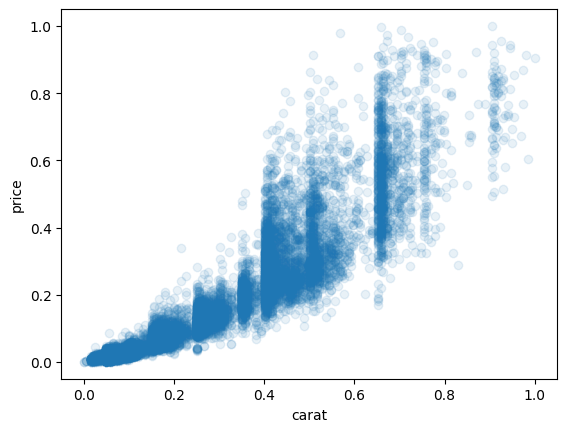

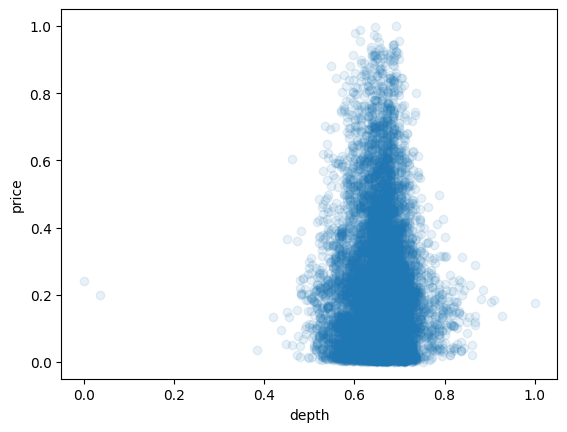

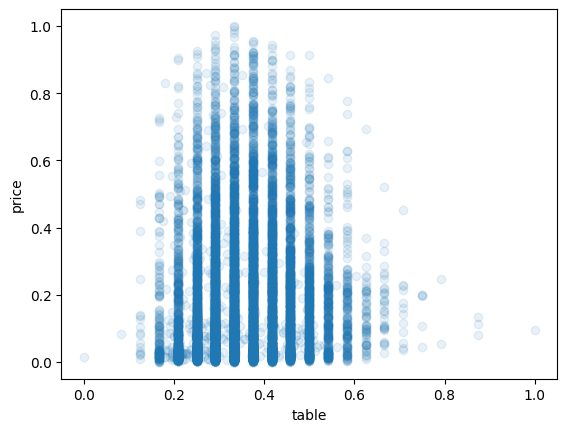

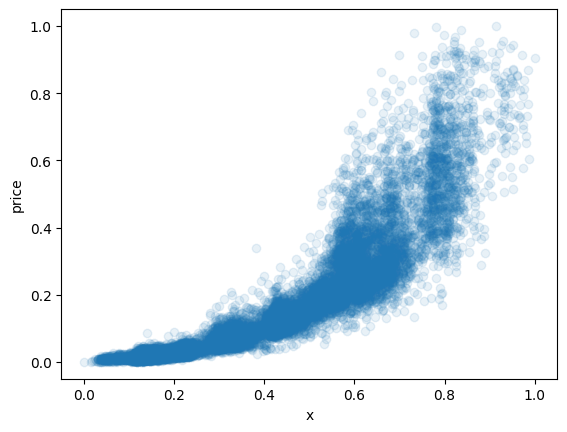

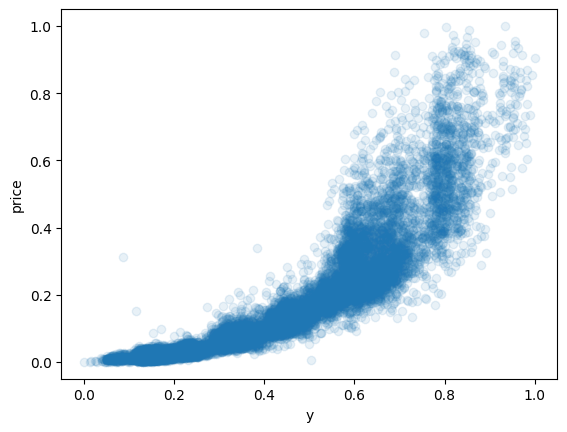

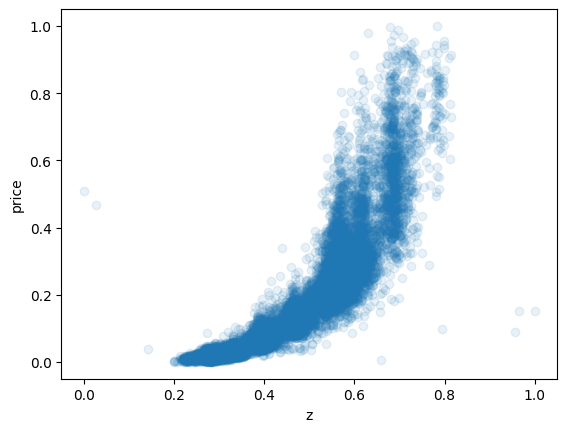

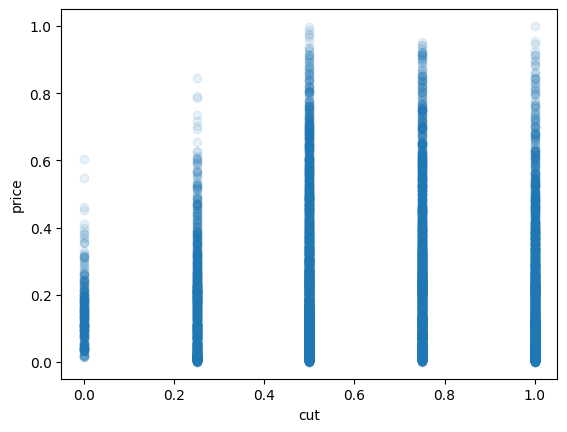

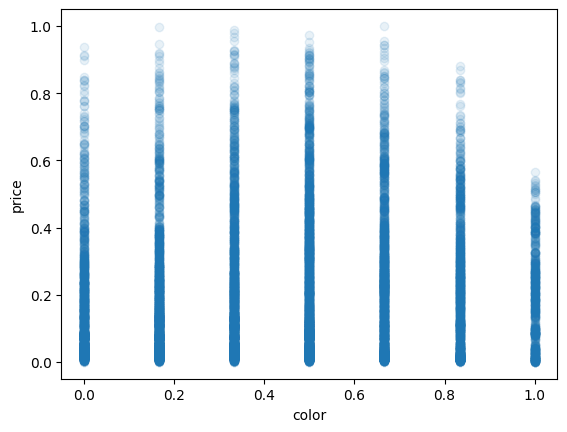

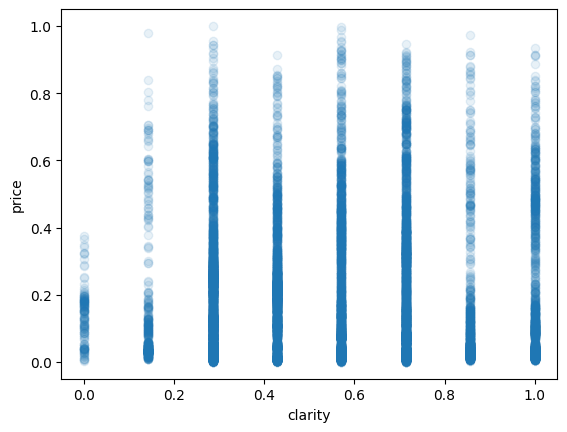

In [70]:
# Plot the normalized data
for f in diamonds_min_max_df.columns:
  if f != "price":
    plt.scatter(diamonds_min_max_df[f], diamonds_min_max_df["price"], alpha=.1)
    plt.xlabel(f)
    plt.ylabel("price")
    plt.show()